In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import nfode
import torch.jit
device = torch.device('cpu')
import random
from datetime import datetime

if __name__ == "__main__":
    data = np.load('data_set.npz')
    t_data = data['t_data']
    x_data = data['x_data']
    
    x_data = torch.tensor(x_data, dtype=torch.float32).requires_grad_(True).to(device)
    t_data = torch.tensor(t_data, dtype=torch.float32).requires_grad_(True).to(device)

input_dim=2
output_dim=2
inner_dim=64
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, inner_dim)
        self.fc2 = nn.Linear(inner_dim, inner_dim)
        self.fc3 = nn.Linear(inner_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ODEModel()
nfode.initialize_params_uniform(model)

In [6]:
num_epochs = 600
k = 1
lr = 0.01
milestones = [120]
gamma = 0.1
model, x_preds, loss_curve, real_loss_curve = nfode.train(model, device, t_data, x_data, num_epochs = num_epochs, k=k, lr=lr, milestones=milestones, gamma=gamma)
torch.save(model, 'model.pt')

1 10 / 600 19:00:11 cpu best real loss: 1.7052431
1 20 / 600 19:00:22 cpu best real loss: 1.6483011
1 30 / 600 19:00:35 cpu best real loss: 1.1410352
1 40 / 600 19:00:46 cpu best real loss: 1.1080437
1 50 / 600 19:00:57 cpu best real loss: 1.1080437
1 60 / 600 19:01:08 cpu best real loss: 1.1080437
1 70 / 600 19:01:18 cpu best real loss: 1.1080437
1 80 / 600 19:01:30 cpu best real loss: 1.1080437
1 90 / 600 19:01:42 cpu best real loss: 0.41257155
1 100 / 600 19:01:53 cpu best real loss: 0.36801058
1 110 / 600 19:02:05 cpu best real loss: 0.13277788
1 120 / 600 19:02:16 cpu best real loss: 0.09729434
1 130 / 600 19:02:29 cpu best real loss: 0.09729434
1 140 / 600 19:02:40 cpu best real loss: 0.053678673
1 150 / 600 19:02:53 cpu best real loss: 0.04594243
1 160 / 600 19:03:04 cpu best real loss: 0.04122017
1 170 / 600 19:03:15 cpu best real loss: 0.025758522
1 180 / 600 19:03:25 cpu best real loss: 0.023923453
1 190 / 600 19:03:35 cpu best real loss: 0.0231946
1 200 / 600 19:03:46 cpu be

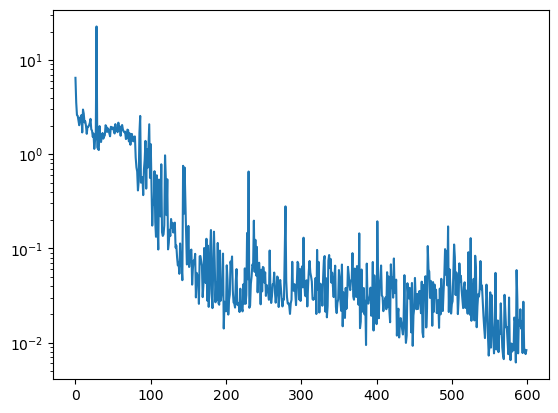

In [7]:
plt.plot(real_loss_curve)
plt.yscale('log')

/tmp/ipykernel_44296/2319333819.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('model.pt')


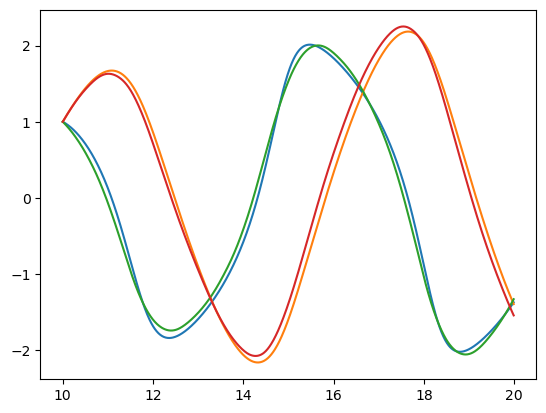

In [8]:
model = torch.load('model.pt')
data = np.load('data_test.npz')
t_data_test = data['t_data']
x_data_test = data['x_data']
x_data_test = torch.tensor(x_data_test, dtype=torch.float32).to(device)
t_data_test = torch.tensor(t_data_test, dtype=torch.float32).unsqueeze(1).to(device)
x0 = x_data_test[:,0]
model.to(device)
x_preds_test = nfode.predict(model, t_data_test, x0)
t_data_test = t_data_test.cpu().detach().numpy()
x_data_test = x_data_test.cpu().detach().numpy()
plt.plot(t_data_test, x_data_test.T)
plt.plot(t_data_test, x_preds_test)